# 1) Problem Overview

##        Medical Cost Analysis


### In this project, I used the Medical Cost Personal Datasets at the link https://www.kaggle.com/datasets/mirichoi0218/insurance.

### The aim of the project is to estimate the approximate cost of a person's health insurance based on the given variables. 


# 2) Collecting of data

## Data set: https://www.kaggle.com/datasets/mirichoi0218/insurance 

## Importing the required libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics


## Read the data


In [2]:
df = pd.read_csv("insurance.csv")


# 3) Examination and visualization of data


# General overview to data

In [3]:
data = df.copy()

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### ---When we look at our dataset with info(), we can see that there is no null value in our data. We can also see numeric and object variables

In [11]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### ---When we look at the general statistical results, we see that the mean and median (50%) values of our independent variables are close to each other. This shows us that our data is close to the normal distribution.

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [13]:
data.shape

(1338, 7)

In [14]:
data.size

9366

## Visualize the data

### Correlation between variables

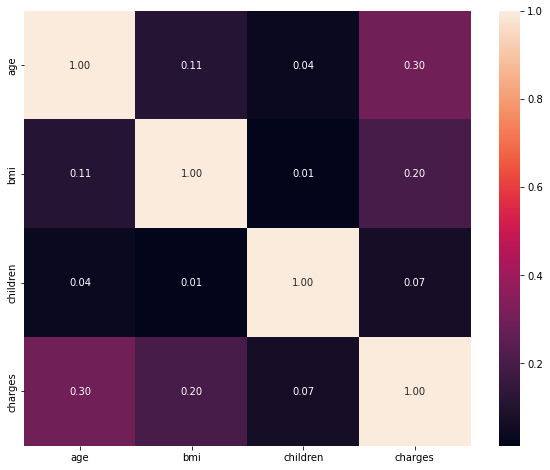

In [15]:
corr = data.corr()
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(corr, annot = True , fmt ='.2f')


### ---When we look at our correlation matrix with a heatmap, we can say that there is no correlation between the variables shown above.

### Distribution of Bmi (Body Mass Index)

In [16]:
data['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

(0.0, 140.0)

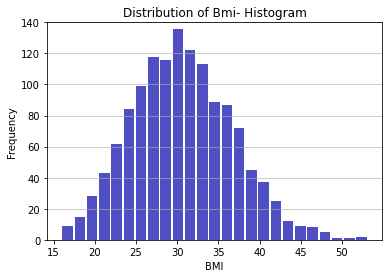

In [17]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=data['bmi'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.title('Distribution of Bmi- Histogram')
maxfreq = n.max()

# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

### ---According to the histogram data, the BMI in our data has a normal distribution. BMI is around 30 and values around 50 can be considered outliers.

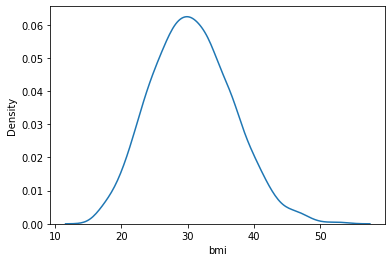

In [18]:
sns.kdeplot(data=data['bmi'])

### Relationship between “smoker” and “charges”

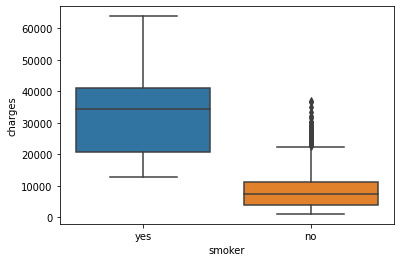

In [19]:
sns.boxplot(x = data.smoker, y = data.charges)

### --- While the expenditures of smokers are concentrated in the range of 20000-40000, the expenditures of non-smokers are concentrated in the range of approximately 10000-3000. Outliers are also observed in non-smokers.

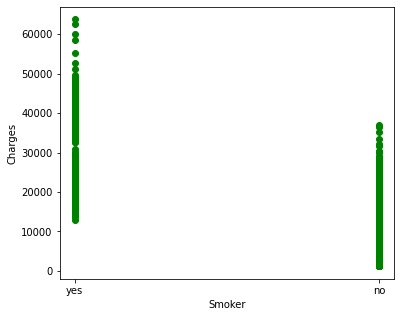

In [20]:
x = data['smoker']
y = data['charges']
#Create a figure object of the size 18x5
fig = plt.figure(figsize = (6,5))

plt.scatter(x,y, color ="green")

plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

### ---Expenditures of smokers and non-smokers are expressed with dots in the scatter plot.

### Relationship between “smoker” and “region”

In [28]:
data.smoker.replace(("yes","no"),(1,0), inplace = True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


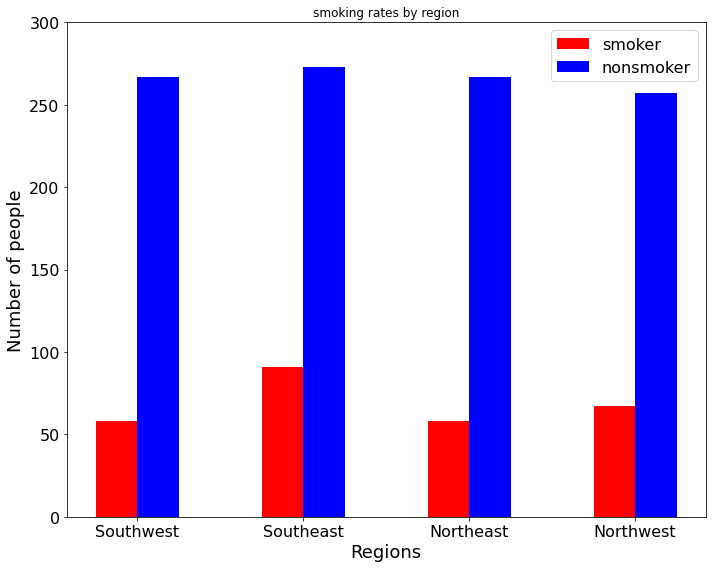

In [53]:
# finding the number of smokers in the regions
smoker_sw = len(data[(data.smoker == 1) & (data.region == "southwest")])
smoker_se = len(data[(data.smoker == 1) & (data.region == "southeast")])
smoker_nw = len(data[(data.smoker == 1) & (data.region == "northwest")])
smoker_ne = len(data[(data.smoker == 1) & (data.region == "northeast")])

# finding the number of non_smokers in the regions
nonsmoker_sw = len(data[(data.smoker == 0) & (data.region == "southwest")])
nonsmoker_se = len(data[(data.smoker == 0) & (data.region == "southeast")])
nonsmoker_nw = len(data[(data.smoker == 0) & (data.region == "northwest")])
nonsmoker_ne = len(data[(data.smoker == 0) & (data.region == "northeast")])

# Create lists for the plot
ind = np.arange(4)  # the x locations for the groups
width = 0.25       # the width of the bars
x_labels = ("Southwest","Southeast","Northeast","Northwest")

num_smokers = [smoker_sw, smoker_se,smoker_nw, smoker_ne]
num_nonsmokers = [nonsmoker_sw, nonsmoker_se,nonsmoker_nw, nonsmoker_ne]

# Build the plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)


plt.yticks(fontsize=16)
plt.xticks(fontsize=16)


rects1 = ax.bar(ind, num_smokers,width = 0.25, align = 'center', capsize = 10 , color='r') 
rects2 = ax.bar(ind+width, num_nonsmokers, width = 0.25, align = 'center', capsize = 10 , color='b')

ax.set_ylim([0,300]) 

ax.set_ylabel('Number of people',fontsize=18)
ax.set_xlabel("Regions",fontsize=18)

ax.set_xticks(ind + width/2) 
ax.set_xticklabels(x_labels)
ax.set_title('smoking rates by region')

plt.tight_layout()
ax.legend( (rects1[0], rects2[0]), ('smoker', 'nonsmoker') , fontsize=16)
plt.show()

### Relationship between “bmi” and “sex”

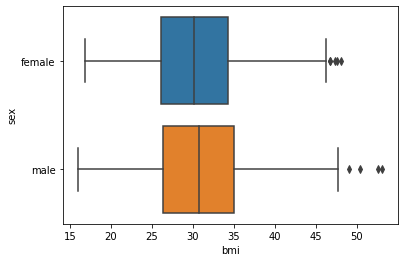

In [22]:
sns.boxplot(x = data.bmi, y = data.sex)

### --- Although the BMI of women and men is generally concentrated in the 25-35 range, the BMI of men is slightly higher than that of women. Outliers are seen in both genders.

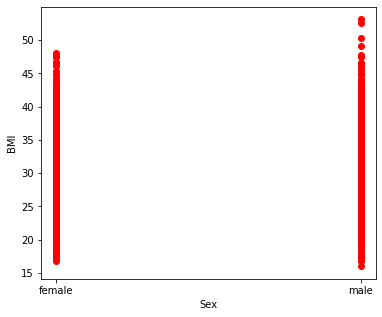

In [ ]:
x = data['sex']
y = data['bmi']
#Create a figure object of the size 18x5
fig = plt.figure(figsize = (6,5))

plt.scatter(x,y, color ="red")

plt.xlabel("Sex")
plt.ylabel("BMI")
plt.show()

### ---The BMI of men and women is expressed as dots on the scatterplot.

### Finding the region with the most children

*************************************************
 the Southeast is the region with the most children, with 382 
*************************************************




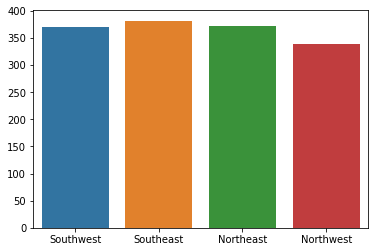

In [27]:
# Finding the number of children in the regions
sw_ch = data.children.loc[df.region == "southwest"].sum()
se_ch = data.children.loc[df.region == "southeast"].sum()
nw_ch = data.children.loc[df.region == "northwest"].sum()
ne_ch = data.children.loc[df.region == "northeast"].sum()

# plotting the bar graph of the number of children in the regions
numberofchild = [sw_ch,se_ch,nw_ch,ne_ch]
regions = ["Southwest","Southeast","Northeast","Northwest"]
sns.barplot(x = regions,y = numberofchild)

# Finding the region with the most children
regions_numofchild = {"Southwest" : sw_ch ,"Southeast" :se_ch ,"Northwest" : nw_ch,"Northeast" : ne_ch}
for i in regions_numofchild.items():
    if i[1] == max(regions_numofchild.values()):
        print("*************************************************\n","the",i[0],"is the region with the most children, with", i[1],"\n*************************************************\n\n")


### Relationship between “age” and “bmi”

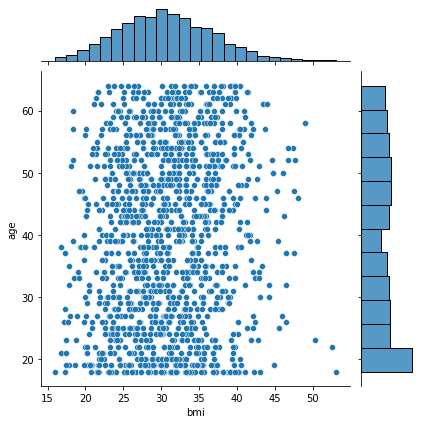

In [ ]:
sns.jointplot(x=data.bmi,y=data.age)

### ---The relationship between BMI and age continuous variables and the intensity plot of each separately are given. According to the graph, individuals in all age groups generally have a BMI in the 20-40 range.

### Relationship between “bmi” and “children”

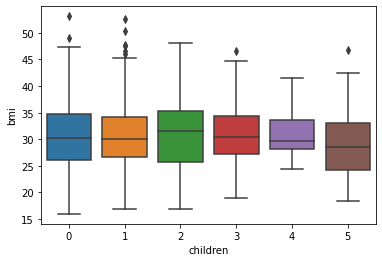

In [ ]:
sns.boxplot(x=data.children, y=data.bmi) 

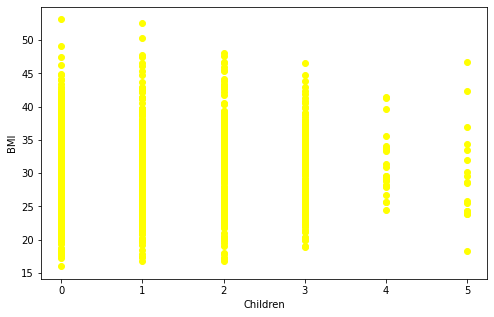

In [ ]:
x = data['children']
y = data['bmi']
#Create a figure object of the size 18x5
fig = plt.figure(figsize = (8,5))

plt.scatter(x,y, color ="yellow")

plt.xlabel("Children")
plt.ylabel("BMI")
plt.show()

### ---There was no correlation between the number of children covered by health insurance and BMI.

### Examination of the presence of outliers in the bmi variable

<AxesSubplot:xlabel='bmi'>

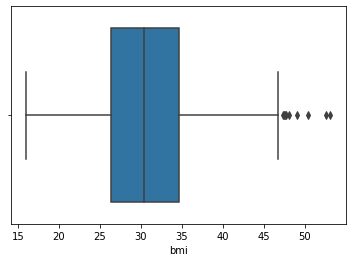

In [4]:
sns.boxplot(x = data.bmi)

### --- Box plot is the most commonly used method for visualizing outliers. In the figure above, outliers are shown to the right of the maximum value.

### Relationship between “bmi” and “charges”

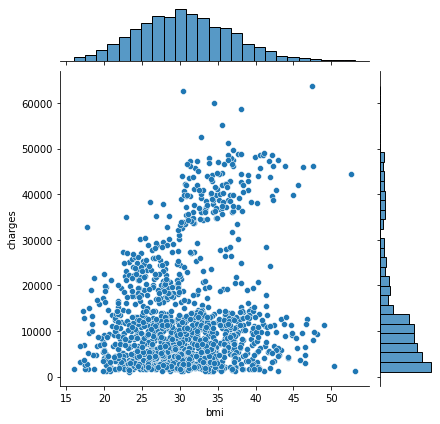

In [ ]:
sns.jointplot(x=data.bmi,y=data.charges)

### ---The relationship between BMI and charges continuous variables and the intensity plot of each separately are given. According to the graph, it is seen that the expenditures of individuals between the ages of 18-44 are generally in the range of 0-15000. However, other than that, the points where the data is concentrated can be seen in the graph.

### Examination of the relationship between “region”, “smoker” and “bmi” using bar plot

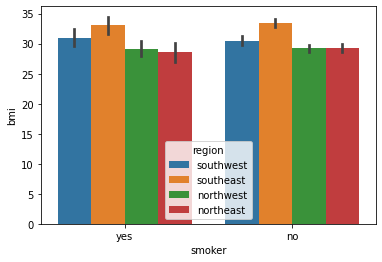

In [ ]:
sns.barplot(x = data.smoker,y = data.bmi,hue = data.region)

### --- When the effect of smoking on BMI by regions is examined, the BMI of smokers in the southwest, southeast and northwest regions is slightly higher than those of non-smokers. No significant difference can be observed in the northeast region.

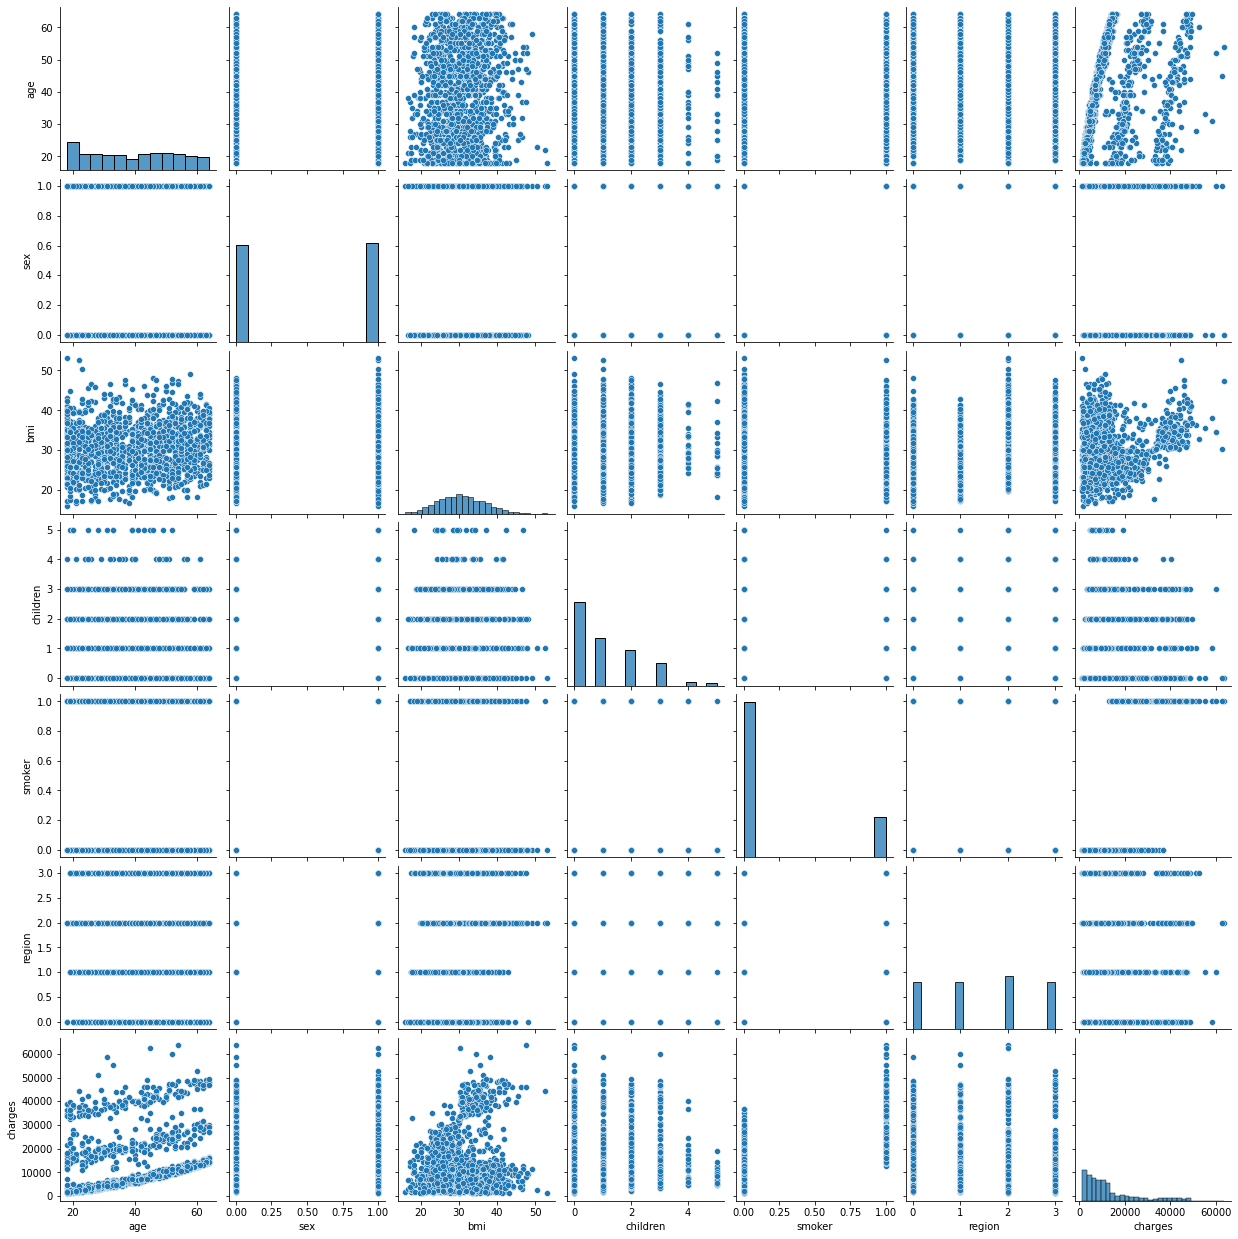

In [68]:
sns.pairplot(data)

# 4) Fitting Data to Machine Learning Models
## Data Preprocessing
### Label Encoding


In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le = LabelEncoder()
data["smoker"] = le.fit_transform(df["smoker"])
data["region"] = le.fit_transform(df["region"])
data["sex"] = le.fit_transform(df["sex"])
data.head()
    

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### One Hot Encoder
### *Label encoding is sufficient. One hot encoding can be used instead of label encoding.

In [11]:
data_encoded = pd.get_dummies(data = data ,drop_first= True)
data_encoded.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Features and Labels

In [9]:
y = data.charges
X = data.drop(["charges"], axis =1).astype("float64")

### Split the data

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Normalization  



In [29]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train = mms.fit_transform(X_train) 
#Eğitim setine normalizasyon uygulamak
X_test = mms.transform(X_test) 
#Test setine normalizasyon uygulamak 


# 5) Model Selection - Creating and Training of the Models


In [30]:

# Importing of regression models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score,KFold


#Creation of models
models = [LGBMRegressor(),
          XGBRegressor(),
          GradientBoostingRegressor(),
          RandomForestRegressor(),
          DecisionTreeRegressor(),
          MLPRegressor(),
          KNeighborsRegressor()
          ]


for i in models:
  #training of data
  trained_model = i.fit(X_train,y_train)

  #computation of cross validation scores of models 
  kf=KFold(n_splits=5)
  score=cross_val_score(trained_model,X,y,cv = kf)
  print("\n",i)
  print(f"Cross Validation Scores are {score}")
  print(f"Average Cross Validation score :{score.mean()}\n")

        
  #comparing of model performance


 LGBMRegressor()
Cross Validation Scores are [0.85250749 0.78644908 0.88026913 0.8292129  0.85389968]
Average Cross Validation score :0.840467655073218

[20:00:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:00:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:00:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:00:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:00:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:00:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

 XGBRegressor()
Cross Validation Scores are [0.87502142 0.80190743 0.89375978 0.851

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi


 MLPRegressor()
Cross Validation Scores are [-0.0333815   0.06497172  0.01210135  0.04213029  0.0004421 ]
Average Cross Validation score :0.01725279164243305


 KNeighborsRegressor()
Cross Validation Scores are [0.14477674 0.03657586 0.02949737 0.13048908 0.16220208]
Average Cross Validation score :0.10070822453572574



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Conclusion: When the cross validation results are evaluated, it is seen that the model with the best performance is the  XGBRegressor() model.Therefore, we continue by choosing the  XGBRegressor() model.

# 6) Hyper-parameter Optimization with Grid Search


In [31]:
from sklearn.model_selection import GridSearchCV

selected_model =  XGBRegressor().fit(X_train,y_train)
y_pred = selected_model.predict(X_test)

gbm_params = {"learning_rate": [0.001,0.1,0.01],
              "max_depth": [3,5,8],
              "n_estimators": [100,200,500],
              "subsample": [1,0.5,0.8],
              "loss": ["ls","lad","quantile"]}

gbm_model = GridSearchCV(selected_model,gbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)
print(gbm_model.best_params_)


[20:00:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 243 candidates, totalling 2430 fits
[20:07:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'learning_rate': 0.01, 'loss': 'ls', 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}


In [32]:
# Optimizing the model with the parameters we optimized with grid search
tuned_model = XGBRegressor( learning_rate= 0.01, loss = 'ls', max_depth= 3, n_estimators= 500, subsample= 0.5).fit(X_train,y_train)

#prediction of tuned model
y_pred = tuned_model.predict(X_test)

[20:08:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# 7) Evaluation of the optimized model using regression model evaluation criteria: R2, MAE, MSE

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

accuracy = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
 
print(f"Accuracy(r2_score): {accuracy} \nMean_absolute_error(MAE): {mae} \nRoot Mean Square Error(Rmse): {rmse} ")
  

Accuracy(r2_score): 0.8673794476604556 
Mean_absolute_error(MAE): 2473.323816134725 
Root Mean Square Error(Rmse): 4473.395387260411 
